In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt

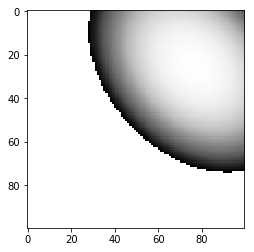

In [2]:
# ellipse
test_matrix = np.zeros((100,100))
def paint_ellipse(m, a, b, r, alpha, origin=[0, 0]):
    x_max, y_max = m.shape[0] // 2, m.shape[1] // 2
    for row in range(0, m.shape[0]):
        for col in range(0, m.shape[1]):
            #if (row - c_y)**2 + (col - c_x)**2 <= r**2:
            #    print("painting r, c = {}, {}".format(row, col))
            # m[row][col] = float(((row - c_y + origin[1])/b)**2 + ((col - c_x - origin[0])/a)**2 <= r**2)
            x, y = (x_max - col + origin[0]), (row - y_max + origin[1])
            if ((x*cos(alpha) - y*sin(alpha))/a)**2 + ((x*sin(alpha) + y*cos(alpha))/b)**2 <= r**2:
                # m[row][col] = (x_max - col + origin[0])**2 + (row - y_max + origin[1])**2
                m[row][col] = ((x*cos(alpha) - y*sin(alpha))/a)**2 + ((x*sin(alpha) + y*cos(alpha))/b)**2

#paint_ellipse(m=test_matrix, a=10, b=2, r=3, alpha = 3, origin=[10, 10])
paint_ellipse(m=test_matrix, a=5, b=7, r=8, alpha = 2.38, origin=[26, 25])

plt.imshow(X=test_matrix, cmap="Greys")
plt.show()

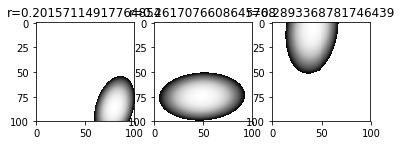

In [3]:
img_h = 100
img_w = 100

o_margin = 0.5  # how much away must the randomly selected origin be from any border, as a fraction of canvas size

for i in range(0,3):
    a_m, a_b = img_h*img_w*0.02 - img_h*img_w*0.005, img_h*img_w*0.005
    b_m, b_b = img_w*img_h*0.02 - img_w*img_h*0.005, img_w*img_h*0.005
    a, b = int(a_m*np.random.rand() + a_b), int(b_m*np.random.rand() + b_b)
    # r_m, r_b = img_h*img_w*0.002 - img_h*img_w*0.001, img_h*img_w*0.001
    # r_m, r_b = area_c*0.008 - area_c*0.008, area_c*0.008
    # r = int(r_m*np.random.rand() + r_b)
    # r = area_c*0.003
    r = (np.random.rand()*20 + 40)/(img_h + img_w) # works for 100
    alpha = np.random.rand()*4.71
    origin = [int((1-o_margin)*2*img_w*np.random.rand() + (o_margin-1)*img_w), 
              int((1-o_margin)*2*img_h*np.random.rand() + (o_margin-1)*img_h)]
    
    ax = plt.subplot(131 + i)
    ax.set_title('r={}'.format(r))
    mat = np.zeros((img_h,img_w))
    paint_ellipse(m=mat, a=a, b=b, r=r, alpha = alpha, origin=origin)
    plt.imshow(X=mat, cmap='Greys')
plt.show()

c_x: 50	c_y: 50


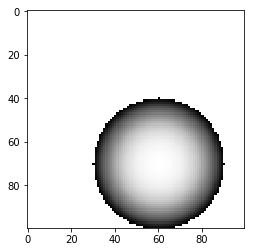

In [4]:
# circle
test_matrix = np.zeros((100,100))
def paint_circle(m, r, origin=[0, 0]):
    max_x, max_y = m.shape[0] // 2, m.shape[1] // 2
    print("c_x: {}\tc_y: {}".format(max_x, max_y))
    for row in range(0, m.shape[0]):
        for col in range(0, m.shape[1]):
            #m[row][col] = float((row - max_y + origin[1])**2 + (col - max_x - origin[0])**2 <= r**2)
            x, y = (max_x - col + origin[0]), (row - max_y + origin[1])
            if x**2 + y**2 <= r**2:
                m[row][col] = (max_x - col + origin[0])**2 + (row - max_y + origin[1])**2
        

paint_circle(test_matrix, 30, origin=[10, -20])

plt.imshow(X=test_matrix, cmap="Greys")
plt.show()

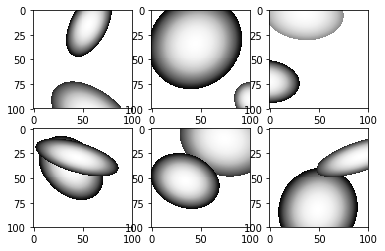

In [5]:
img_h = 100
img_w = 100

o_margin = 0.4  # how much away must the randomly selected origin be from any border, as a fraction of canvas size

def paintone(mat):
    a_m, a_b = img_h*img_w*0.02 - img_h*img_w*0.005, img_h*img_w*0.005
    b_m, b_b = img_w*img_h*0.02 - img_w*img_h*0.005, img_w*img_h*0.005
    a, b = int(a_m*np.random.rand() + a_b), int(b_m*np.random.rand() + b_b)
    r = (np.random.rand()*20 + 40)/(img_h + img_w) # works for 100
    alpha = np.random.rand()*4.71
    origin = [int((1-o_margin)*2*img_w*np.random.rand() + (o_margin-1)*img_w), 
              int((1-o_margin)*2*img_h*np.random.rand() + (o_margin-1)*img_h)]
    paint_ellipse(m=mat, a=a, b=b, r=r, alpha = alpha, origin=origin)

for i in range(0,6):
    mat = np.zeros((100,100))
    paintone(mat)
    paintone(mat)
    plt.subplot(231 + i)
    plt.imshow(X=mat, cmap='Greys')
plt.show()

In [6]:
import yaml

with open("experiments_configs/dataset_generation_config1.yaml", "r") as config_fh:
    config = yaml.load(config_fh)

In [7]:
for c in config:
    print(c)

shapes


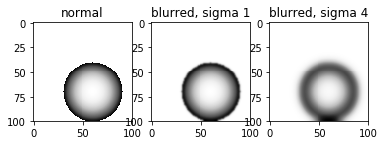

In [8]:
from scipy.ndimage.filters import gaussian_filter
blurred = gaussian_filter(test_matrix, sigma=1, order=0)
blurred4 = gaussian_filter(test_matrix, sigma=4, order=0)
ax = plt.subplot(131)
ax.set_title('normal')
ax.imshow(test_matrix, cmap='Greys')
ax = plt.subplot(132)
ax.set_title('blurred, sigma 1')
ax.imshow(blurred, cmap='Greys')
ax = plt.subplot(133)
ax.set_title('blurred, sigma 4')
ax.imshow(blurred4, cmap='Greys')
plt.show()


In [9]:
from scipy.ndimage.filters import gaussian_filter

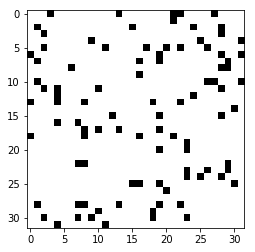

In [10]:
bernoulli = np.zeros((32, 32))
bernoulli /= bernoulli.sum() if bernoulli.sum() > 0 else 1
for row in range(0, bernoulli.shape[0]):
    for col in range(0, bernoulli.shape[1]):
        if np.random.rand() < 0.1:
            bernoulli[row][col] = 1 - bernoulli[row][col]
plt.imshow(bernoulli, cmap='Greys')
plt.show()

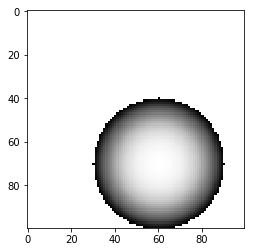

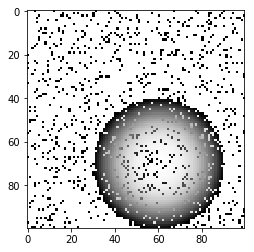

In [11]:
plt.imshow(test_matrix, cmap='Greys')
plt.show()
noised = test_matrix.copy()
noised /= noised.sum() if noised.sum() > 0 else 1
max_val = noised.max()
#noised[20][20] = 1.
#noised[20][20] = 0.005
for row in range(0, noised.shape[0]):
    for col in range(0, noised.shape[1]):
        if np.random.rand() <= 0.1:
            noised[row][col] = noised.max() - noised[row][col]
plt.imshow(noised/noised.sum(), cmap='Greys')
plt.show()


1.0


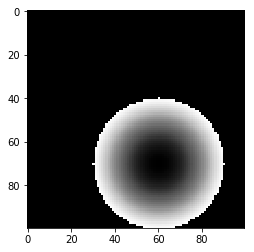

In [12]:
min([v for row in test_matrix for v in row])
print(((test_matrix)/np.array(test_matrix).sum()).sum())
plt.imshow(1-(np.array(test_matrix)/np.array(test_matrix).sum()), cmap='Greys')
plt.show()

In [77]:
m = np.array([i for i in range(0, 25)]).reshape([5,5])
print(m[[1, 3],[2, 4]])
print(m)
m[[1, 3],[2, 4]] = 0
print(m)
indexes = [i for i in range(0, m.shape[0] * m.shape[1])]
for i in indexes:
    c = i % m.shape[1]
    r = (i - c) // m.shape[0]
    print('r={}, c={}'.format(r, c))

[ 7 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  1  2  3  4]
 [ 5  6  0  8  9]
 [10 11 12 13 14]
 [15 16 17 18  0]
 [20 21 22 23 24]]
r=0, c=0
r=0, c=1
r=0, c=2
r=0, c=3
r=0, c=4
r=1, c=0
r=1, c=1
r=1, c=2
r=1, c=3
r=1, c=4
r=2, c=0
r=2, c=1
r=2, c=2
r=2, c=3
r=2, c=4
r=3, c=0
r=3, c=1
r=3, c=2
r=3, c=3
r=3, c=4
r=4, c=0
r=4, c=1
r=4, c=2
r=4, c=3
r=4, c=4


In [14]:
m[:,:] = 0
m

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [15]:
import yaml

with open("experiments_configs/dataset_generation_config_noise.yaml", "r") as config_fh:
    config = yaml.load(config_fh)

In [16]:
config

{'filters': [{'config': {'grey': [0.2, 0.35]}, 'filter': 'background_shader'},
  {'config': {'dark': False, 'num_pixels': 50}, 'filter': 'background_noise'},
  {'config': {'sigma': 1.5}, 'filter': 'background_blurr'},
  {'config': {'sigma': 1.5}, 'filter': 'blurr'},
  {'config': {'dark': False, 'num_pixels': 50}, 'filter': 'pixel_noise'},
  {'config': {'dark': True, 'num_pixels': 50}, 'filter': 'consistent_noise'}],
 'img_h': 32,
 'img_w': 32,
 'shapes': [{'config': {'dark': False, 'origin': None, 'samples': 6},
   'shape': 'ellipse'},
  {'config': {'dark': False, 'origin': None, 'samples': 6}, 'shape': 'dipole'},
  {'config': {'dark': True, 'origin': None, 'samples': 6}, 'shape': 'snow'}],
 'transformations': [{'transformation': 'vectorize'},
  {'config': {'first': 5, 'last': 5}, 'transformation': 'cut'}]}

In [17]:
config['img_w'] = 32
config['img_h'] = 32
config

{'filters': [{'config': {'grey': [0.2, 0.35]}, 'filter': 'background_shader'},
  {'config': {'dark': False, 'num_pixels': 50}, 'filter': 'background_noise'},
  {'config': {'sigma': 1.5}, 'filter': 'background_blurr'},
  {'config': {'sigma': 1.5}, 'filter': 'blurr'},
  {'config': {'dark': False, 'num_pixels': 50}, 'filter': 'pixel_noise'},
  {'config': {'dark': True, 'num_pixels': 50}, 'filter': 'consistent_noise'}],
 'img_h': 32,
 'img_w': 32,
 'shapes': [{'config': {'dark': False, 'origin': None, 'samples': 6},
   'shape': 'ellipse'},
  {'config': {'dark': False, 'origin': None, 'samples': 6}, 'shape': 'dipole'},
  {'config': {'dark': True, 'origin': None, 'samples': 6}, 'shape': 'snow'}],
 'transformations': [{'transformation': 'vectorize'},
  {'config': {'first': 5, 'last': 5}, 'transformation': 'cut'}]}

In [18]:
np.zeros()

TypeError: Required argument 'shape' (pos 1) not found

In [ ]:
a = 5 if False elif False 4 else 3

In [ ]:
print(m[[1, 3], [1, 4]])
print(m)
m2 = m.copy()
m2[[1, 3], [1, 4]] = [-1, -2]
print(m2)

In [ ]:
m.flatten()[2:-3]

In [55]:
a = np.array(['a', 'b', 'c', 'd', 'e'], dtype=str)
a

array(['a', 'b', 'c', 'd', 'e'], dtype='<U1')

In [56]:
import random
random.seed(42)
order = list(range(0, len(a)))
random.shuffle(order)
order

[3, 1, 2, 4, 0]

In [72]:
def encode(l, key):
    random.seed(42)
    order = list(range(0, len(l)))
    print('len(order): {}:\n{}'.format(len(order), order))
    random.shuffle(order)
    print('shape of shuffled order: {}'.format(l[order].shape))
    return l[order]
    
def decode(l, key):
    random.seed(42)
    order = list(range(0, len(l)))
    random.shuffle(order)
    reshuffle = [order.index(i) for i in range(0, len(order))]
    return l[reshuffle]
    
    

len(order): 10000:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

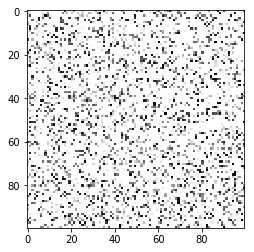

In [105]:
encoded = np.reshape(encode(test_matrix.flatten(), 42), newshape=(100, 100))
plt.imshow(encoded, cmap="Greys")
plt.show()

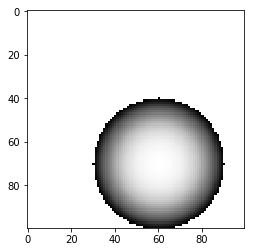

len(order): 100:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
shape of shuffled order: (100, 100)


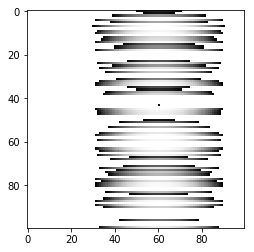

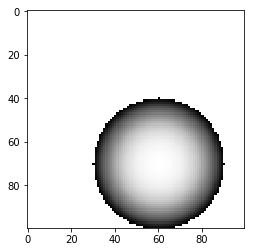

In [73]:
plt.imshow(test_matrix, cmap="Greys")
plt.show()
encoded = encode(test_matrix, 42)
plt.imshow(encoded, cmap="Greys")
plt.show()
decoded = decode(encoded, 42)
plt.imshow(decoded, cmap="Greys")
plt.show()

In [71]:
len(test_matrix)

100

In [70]:
print(test_matrix.shape)
print(encoded.shape)
print(decoded.shape)

(100, 100)
(5, 100)
(5, 100)


In [62]:
print(a)
a = encode(a, 42)
print(a)

['a' 'b' 'c' 'd' 'e']
['d' 'b' 'c' 'e' 'a']


In [63]:
print(a)
a = decode(a, 42)
print(a)

['d' 'b' 'c' 'e' 'a']
['a' 'b' 'c' 'd' 'e']


In [57]:
a[order]

array(['d', 'b', 'c', 'e', 'a'], dtype='<U1')

In [58]:
reshuffle = [order.index(i) for i in range(0, len(order))]
reshuffle

[4, 1, 2, 0, 3]

In [60]:
a[order][reshuffle]

array(['a', 'b', 'c', 'd', 'e'], dtype='<U1')

In [53]:
a = decode(a, 42)
a

array(['d', 'b', 'c', 'e', 'a'], dtype='<U1')

In [54]:
a

array(['d', 'b', 'c', 'e', 'a'], dtype='<U1')

In [81]:
print(m)
print(m[2:-1])

[[ 0  1  2  3  4]
 [ 5  6  0  8  9]
 [10 11 12 13 14]
 [15 16 17 18  0]
 [20 21 22 23 24]]
[[10 11 12 13 14]
 [15 16 17 18  0]]


In [90]:
np.concatenate((np.array([[0] * 5] * 2), m, np.array([[0] * 5] * 1)))

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  0,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18,  0],
       [20, 21, 22, 23, 24],
       [ 0,  0,  0,  0,  0]])

In [97]:
np.concatenate((np.array(['o'] * 5), a))

array(['o', 'o', 'o', 'o', 'o', 'a', 'b', 'c', 'd', 'e'], dtype='<U1')

In [100]:
np.reshape(a[:-1], newshape=(2,2))

array([['a', 'b'],
       ['c', 'd']], dtype='<U1')